# Using the qiskit interface of the mGST

In this notebook we will generate random sequences of gates, create qiskit circuits from them, and simulate them on a qiskit simulator.
Then we estimate the gates.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from mGST import qiskit_interface
from qiskit.circuit.library import RXGate, RYGate, RZZGate, IGate

In [2]:
# Example usage with RX, RY, and RZZ gates
rx_pi_2 = RXGate(np.pi / 2)
rx_pi = RXGate(np.pi)
ry_pi_2 = RYGate(np.pi / 2)
ry_pi = RYGate(np.pi)
rzz_pi_2 = RZZGate(np.pi / 2)
idle_gate = IGate()

gate_set = [idle_gate, rx_pi_2, ry_pi_2, rx_pi, ry_pi]
K_true = qiskit_interface.qiskit_gate_to_kraus(gate_set)

In [3]:
sequence_number = 100  # Number of sequences
shots = 5000  # Number of samples per sequences
sequence_length = 8

In [4]:
gate_sequences = qiskit_interface.get_gate_sequence(sequence_number, sequence_length, len(gate_set))
qiskit_circuits = qiskit_interface.get_qiskit_circuits(gate_sequences, gate_set)
sequence_results = qiskit_interface.simulate_circuit(qiskit_circuits, shots)

Starting optimization...
 20%|██        | 6/30 [00:02<00:09,  2.56it/s]
Optimization successful, improving estimate over full data....
 40%|████      | 4/10 [00:02<00:04,  1.42it/s]
#################
	 Convergence criterion satisfied
	 Final objective function value 2.293623077234362e-05 with # of initializations: 1 
 	 Total runtime: 5.182209253311157
Mean variation error: 0.005147889817787967


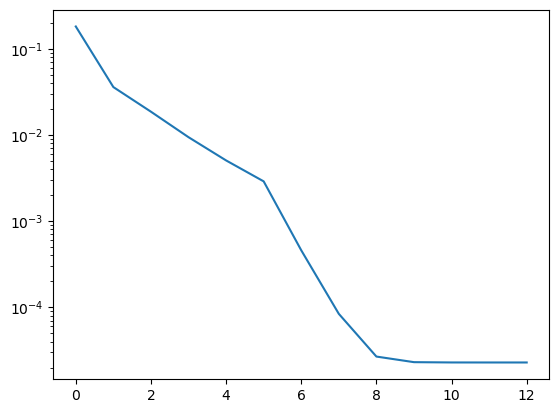

In [5]:
qiskit_interface.get_gate_estimation(gate_set, gate_sequences, len(gate_set), sequence_length,
                                     sequence_results, shots)